<a href="https://colab.research.google.com/github/vishnu-27-dev/DATA-ANALYSIS/blob/main/DataAnalysis1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Load the csv file into pandas dataframe
car = pd.read_csv("/content/cars_engage_2022.csv")
car.head()

,Unnamed: 0,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,...,USB_Compatibility,Android_Auto,Apple_CarPlay,Unnamed: 112,Infotainment_Screen,Multifunction_Steering_Wheel,Average_Speed,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System
0,0,Tata,Nano Genx,Xt,"2,92,667",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Tata,Nano Genx,Xe,"2,36,447",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Tata,Nano Genx,Emax Xm,"Rs. 2,96,661",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Tata,Nano Genx,Xta,"Rs. 3,34,768",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Tata,Nano Genx,Xm,"Rs. 2,72,223",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#No.of data present
car.shape

(1276, 119)

In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Columns: 119 entries, Unnamed: 0 to Navigation_System
dtypes: float64(6), int64(1), object(112)
memory usage: 1.2+ MB


In [ ]:
#Removing irrelevant features
car = car.drop(['Front_Track','Rear_Track','Front_Tyre_&_Rim','Rear_Tyre_&_Rim','Tachometer','Seats_Material'],axis=1)

In [ ]:
#Removing the duplicate Data
car=car.drop_duplicates(subset='Model',keep='first')
car.count()

Unnamed: 0                       263
Make                             235
Model                            263
Variant                          263
Ex-Showroom_Price                263
                                ... 
Multifunction_Steering_Wheel     179
Average_Speed                    176
EBA_(Electronic_Brake_Assist)    158
Seat_Height_Adjustment           189
Navigation_System                153
Length: 113, dtype: int64

In [ ]:
#Displaying the rows with no.of.null values
print(car.isnull().sum())

Unnamed: 0                         0
Make                              28
Model                              0
Variant                            0
Ex-Showroom_Price                  0
                                ... 
Multifunction_Steering_Wheel      84
Average_Speed                     87
EBA_(Electronic_Brake_Assist)    105
Seat_Height_Adjustment            74
Navigation_System                110
Length: 113, dtype: int64


**QUALITY OF DATA**

*   Ex-Showroom_Price has Rs. with int and have to convert object to int. 
*   Column "Make" has nan values, therefore nan are replaced by the values of column Model.

*   Column Seating_Capacity has null values








**CLEANING OF DATA**

In [ ]:
#backup the data
backup = car.copy()

In [ ]:
car["Ex-Showroom_Price"] = car["Ex-Showroom_Price"].str.replace(r'.* ([\d,]+)+$', r'\1').str.replace(',', '').astype('int32')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [ ]:
car['Ex-Showroom_Price']

0         292667
6         279650
12        353290
24        352136
29        377588
          ...   
1255      748370
1258     2903750
1263    34167064
1265      991000
1275     6862560
Name: Ex-Showroom_Price, Length: 263, dtype: int32

In [ ]:
#Replacing the NAN values in column Make with values in column Model
car.Make.fillna(car.Model, inplace=True)

In [ ]:
#finding the rows which have Seating_Capacity as null values
car[car['Seating_Capacity'].isna()]

,Unnamed: 0,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,...,USB_Compatibility,Android_Auto,Apple_CarPlay,Unnamed: 112,Infotainment_Screen,Multifunction_Steering_Wheel,Average_Speed,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System
239,239,Mahindra,Alturas G4,2Wd At,2770150,2157 cc,4.0,NaN,FWD (Front Wheel Drive),In-line,...,Yes,NaN,NaN,NaN,Touch Sensitive,Multifunction Steering Wheel,Yes,Yes,Electric Adjustment with Memory,Yes
1162,1162,Jaguar,F-Type,5.0 Convertible R,23659454,5000 cc,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Multifunction Steering Wheel,NaN,NaN,NaN,Yes
1253,1253,Porsche,Cayenne Coupe,Base,13151000,2995 cc,6.0,4.0,AWD (All Wheel Drive),V,...,Yes,Yes,Yes,NaN,Touch Sensitive,With gear shift paddles,Yes,Yes,Electric Adjustment with Memory,Yes


In [ ]:
# Filling the rows with the mean of the column
val = car['Seating_Capacity'].mean()
car['Seating_Capacity'][239] = round(val)

val = car['Seating_Capacity'].mean()
car['Seating_Capacity'][1162]= round(val)

val = car['Seating_Capacity'].mean()
car['Seating_Capacity'][1253]= round(val)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
#Changing the data type of the column from float to int
car['Seating_Capacity'].astype(int)

0       4
6       5
12      5
24      5
29      5
       ..
1255    5
1258    7
1263    4
1265    5
1275    7
Name: Seating_Capacity, Length: 263, dtype: int64

In [ ]:
car.describe()

,Unnamed: 0,Ex-Showroom_Price,Cylinders,Valves_Per_Cylinder,Doors,Seating_Capacity,Number_of_Airbags,Unnamed: 112
count,263.000000,2.630000e+02,248.00000,239.000000,261.000000,263.000000,220.000000,0.0
mean,652.262357,9.443901e+06,5.03629,4.117155,4.256705,5.057034,4.945455,NaN
std,369.819767,1.852458e+07,2.36427,1.213924,1.018673,1.406290,2.785600,NaN
min,0.000000,2.630000e+05,2.00000,1.000000,2.000000,2.000000,1.000000,NaN
25%,312.500000,7.899565e+05,4.00000,4.000000,4.000000,5.000000,2.000000,NaN
50%,687.000000,2.903750e+06,4.00000,4.000000,5.000000,5.000000,6.000000,NaN
75%,993.000000,8.325000e+06,6.00000,4.000000,5.000000,5.000000,7.000000,NaN
max,1275.000000,1.921429e+08,16.00000,16.000000,5.000000,16.000000,14.000000,NaN


**OUTLIERS**

75% of the cars are less than 83 lakhs.So the remaining 25% are considered to be the outliers

In [ ]:
# Removing Outliers
car=car[car["Ex-Showroom_Price"]<1e7].reset_index(drop=True)

In [ ]:
#Storing the cleaned dataset
car.to_csv("Cleaned car.csv")

**MODEL**

In [ ]:
x=car[['Make','Seating_Capacity','Fuel_Type']]
y=car['Ex-Showroom_Price']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [ ]:
ohe = OneHotEncoder(handle_unknown="ignore")
ohe.fit(x)
ohe.categories_

[array(['Audi', 'Bajaj', 'Bmw', 'Datsun', 'Dc', 'Fiat', 'Force', 'Ford',
        'Go+', 'Honda', 'Hyundai', 'Icml', 'Isuzu', 'Jaguar', 'Jeep',
        'Kia', 'Land Rover', 'Land Rover Rover', 'Lexus', 'Mahindra',
        'Maruti Suzuki', 'Maruti Suzuki R', 'Mercedes-Benz A-Class',
        'Mercedes-Benz B-Class', 'Mercedes-Benz C-Class',
        'Mercedes-Benz C-Class Cabriolet', 'Mercedes-Benz Cla-Class',
        'Mercedes-Benz Cls', 'Mercedes-Benz E-Class',
        'Mercedes-Benz E-Class All Terrain',
        'Mercedes-Benz E-Class Cabriolet', 'Mercedes-Benz Gla-Class',
        'Mercedes-Benz Glc', 'Mercedes-Benz Gle', 'Mercedes-Benz Gls',
        'Mercedes-Benz V-Class', 'Mg', 'Mini', 'Mitsubishi', 'Nissan',
        'Porsche', 'Premier', 'Renault', 'Skoda', 'Tata', 'Toyota',
        'Volkswagen', 'Volvo'], dtype=object),
 array([ 2.,  4.,  5.,  6.,  7.,  8.,  9., 16.]),
 array(['CNG + Petrol', 'Diesel', 'Electric', 'Hybrid', 'Petrol'],
       dtype=object)]

In [ ]:
column_trans = make_column_transformer((OneHotEncoder(categories=ohe.categories_),['Make','Seating_Capacity','Fuel_Type']))

In [ ]:
lr = LinearRegression()

In [ ]:
pipe = make_pipeline(column_trans,lr)
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi', 'Bajaj', 'Bmw', 'Datsun', 'Dc', 'Fiat', 'Force', 'Ford',
       'Go+', 'Honda', 'Hyundai', 'Icml', 'Isuzu', 'Jaguar', 'Jeep',
       'Kia', 'Land Rover', 'Land Rover Rover', 'Lexus', 'Mahindra',
       'Maruti Suzuki', 'Maruti Suzuki R', 'Mercedes-Benz A-Class',
       'Mercedes-B...
       'Mercedes-Benz Glc', 'Mercedes-Benz Gle', 'Mercedes-Benz Gls',
       'Mercedes-Benz V-Class', 'Mg', 'Mini', 'Mitsubishi', 'Nissan',
       'Porsche', 'Premier', 'Renault', 'Skoda', 'Tata', 'Toyota',
       'Volkswagen', 'Volvo'], dtype=object),
                                                                            array([ 2.,  4.,  5.,  6.,  7.,  8.,  9., 16.]),
                                                                            array(['CNG + Petrol', 'Diesel', 'Electric', 'Hybrid', 'Petrol'],

In [ ]:
y_pred = pipe.predict(x_test)

In [ ]:
import pickle

In [ ]:
pickle.dump(pipe,open("LinearRegressionModel.pkl",'wb'))

In [ ]:
pipe.predict(pd.DataFrame([['Tata',7,'Petrol']],columns=['Make','Seating_Capacity','Fuel_Type']))


array([1434155.42454758])

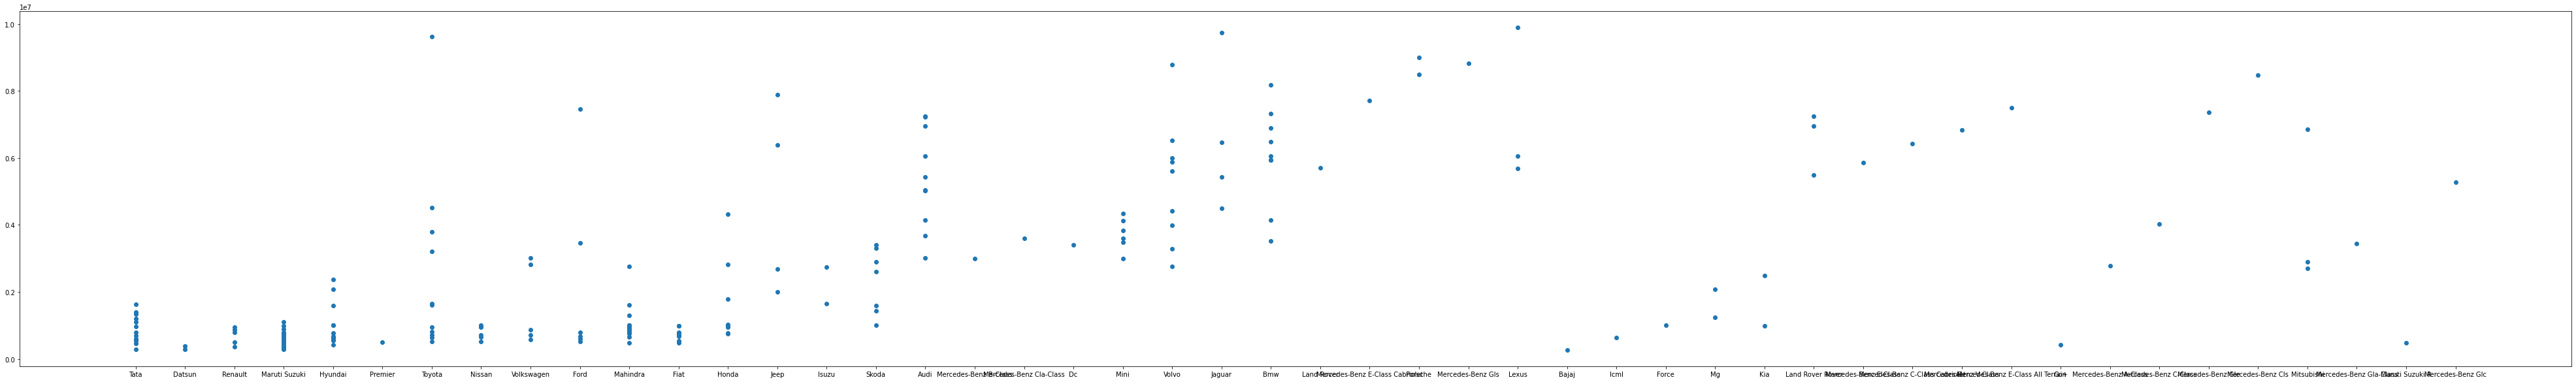

<Figure size 432x288 with 0 Axes>

In [ ]:
plt_1 = plt.figure(figsize=(70, 10))
plt.scatter(car["Make"], car["Ex-Showroom_Price"])
plt.show()
plt.savefig("Plot.png")